In [1]:
from rdkit.Chem import SDMolSupplier, Draw
from rdkit import Chem
import sys
sys.path.append("../")
from tcad.mapex.genetic import GA
from tcad.mapex.pharmacophore import PharmComplex
from rdkit.Chem.Draw import IPythonConsole
import py3Dmol


## Loading clustered molecules

loaded 40 molecules


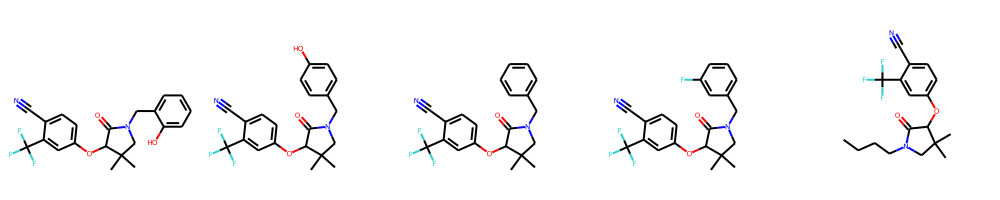

In [2]:
filepath = "../data/molecules/androgen.sdf"
molecules = []

with SDMolSupplier(filepath) as stream_in:
    
    for molecule in stream_in:
        molecules.append(molecule)

print(f"loaded {len(molecules)} molecules")
Draw.MolsToGridImage(molecules[5:10], molsPerRow=5)

## As input genetic algoritm instance takes smiles representations

In [3]:
smiles = [Chem.MolToSmiles(molecule) for molecule in molecules[:5]]

### Genetic Algorithm (GA) instance
Creates a GA instance with following params:
- Set of molecules
- Number of individs in generation
- Chance for mutation to occur
- Number of generations
- Use Crippen (False) to perform alignment
- Verbose for details

In [4]:
ga_instance = GA(smiles, 30, 10, 0.3, 20,)
ga_instance.run(logg_iter=10)

2022-01-17 15:16:43.099 | INFO     | tcad.mapex.genetic:_create_confs:44 - Generating conformations..
2022-01-17 15:16:49.155 | INFO     | tcad.mapex.genetic:_create_confs:52 - Done..
2022-01-17 15:16:50.352 | INFO     | tcad.mapex.genetic:run:175 - Best chromosome score is: 163.73
2022-01-17 15:16:59.566 | INFO     | tcad.mapex.genetic:run:175 - Best chromosome score is: 170.61
2022-01-17 15:17:09.173 | INFO     | tcad.mapex.genetic:run:187 - Best chromosome score is: 170.61


In [5]:
# get aligned molecules amd best conformation ids
aligned_molecules = ga_instance.get_molecules()
best_chromosome = ga_instance.best_chromosome

# writing molecules to mol blocks
mol_blocks = [Chem.MolToMolBlock(mol, confId=idx) for mol, idx  in zip(aligned_molecules, best_chromosome)]

## Building a pharmacophore

In [ ]:
p_complex=PharmComplex(aligned_molecules, best_chromosome)
p_complex.create()

coords = p_complex.get_coords()

## Visualize molecules and pharmacophore features

In [6]:
view = p_complex.show(mol_blocks, coords)
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol